# Introduction to NumPy

### Modules - Basics
<section class="post-meta">
By Thorvald Ballestad, Niels Henrik Aase, Eilif Sommer Øyre and Jon Andreas Støvneng.
</section>
Last edited: March 21 2023 Tom Abel
___

## Introduction

NumPy is a Python package that is omnipresent in computational physics.
It greatly increase calculation speed and offers a more intuitive way of working with our data.

This notebook covers the very basics of using NumPy in computational physics, with the assumption that the reader has basic Python knowledge.

Firstly, we must include the `numpy` package, so that we are allowed to use it.
If you are unfamiliar with the concept of importing packages in Python, you can think of it as including a file with functions that we want to use.

In [1]:
import numpy as np  # 'as np' tells python to name NumPy np

# We will use this for demonstration. Plotting is not part of this notebook
import matplotlib.pyplot as plt

Above we also imported `matplotlib` for plotting. See [this](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/basic_plotting.ipynb) notebook if you wish to learn more about plotting.

NumPy introduces a new data container, known as an _array_. Arrays are the most important feature of NumPy, and all features of the NumPy package are based around this data container. It looks much like a list, but has some important features that lists do not have. We will explore this by examples:

In [2]:
my_list = [0, 1, 2, 3, 4]  # Normal Python list
my_array = np.array([0, 1, 2, 3, 4])  # NumPy array

# Let us see what they look like:
print(my_list)
print(my_array)

[0, 1, 2, 3, 4]
[0 1 2 3 4]


Note how they look almost the same, the only difference being that arrays do not have commas between it's elements (when printed).

Let us look at the power of these arrays!

In [3]:
# Remember how lists behave when we whish to do mathematical operations on them:
print("my_list*2:\t", my_list*2)

my_list*2:	 [0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


We get our list repeated, clearly not what we intended!

In [4]:
print("my_array*2:\t", my_array*2)

my_array*2:	 [0 2 4 6 8]


Each element is multiplied by two, exactly the behavior we are used with from vector calculus.

We can actually do this with most mathematical operators and functions.

In [5]:
# remember that x**y is python syntax for x^y, that is x to the power of y
print("my_array**2:\t\t", my_array**2)
print("my_array**2 - 3/2:\t", my_array**2 - 3/2)

# We can even do this with functions!
def my_function(x):
    y = x + 1
    return y**2

print("my_function(my_array):\t", my_function(my_array))

my_array**2:		 [ 0  1  4  9 16]
my_array**2 - 3/2:	 [-1.5 -0.5  2.5  7.5 14.5]
my_function(my_array):	 [ 1  4  9 16 25]


The latter example demonstrates the power of operating on arrays element-wise. If you use a normal Python list instead of a NumPy-array, one would have to iterate through all the elements of `x` using a `for` loop and then append the results to a new list to get the same result! This is shown below.

In [6]:
np.sin(my_array)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [7]:
def my_function2(x):
    y = [] # Creating an empty python list
    for i in range(len(x)):
        y_element = x[i] + 1
        y.append(y_element**2)
    return y

print("my_function2(my_list):\t", my_function2(my_list))

my_function2(my_list):	 [1, 4, 9, 16, 25]


**The lesson is: use NumPy arrays, not Python lists.
**
NumPy includes many mathematical functions, like $\sin, \cos, \cosh,\exp, \log$.
They usually have intuitive names, such as `np.sin`, `np.exp`, and so forth.
One can often try the mathematical name, and hope that NumPy has the function.

In [8]:
# Some mathematical functions
x = np.array([-1, -0.5, 0, 0.5, 1])
print("sin(x) =\t", np.sin(x))
print("arccos(x) =\t", np.arccos(x))
print("log(x+10) = \t", np.log(x+10))
print("log10(x+10) =\t", np.log10(x+10))

sin(x) =	 [-0.84147098 -0.47942554  0.          0.47942554  0.84147098]
arccos(x) =	 [3.14159265 2.0943951  1.57079633 1.04719755 0.        ]
log(x+10) = 	 [2.19722458 2.2512918  2.30258509 2.35137526 2.39789527]
log10(x+10) =	 [0.95424251 0.97772361 1.         1.0211893  1.04139269]


You might already see how practical this is. For example if we wish to plot $y=f(x)$, we can just pass the entire $x$-array to our function, instead of using a `for` loop as we normally would with Python.

x:	 [ 1  2  3  4  5  6  7  8  9 10]
y:	 [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825  0.41211849 -0.54402111]


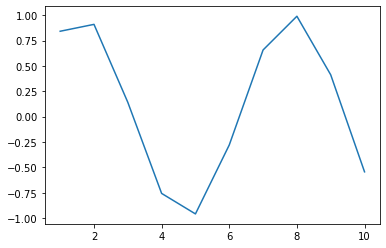

In [9]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.sin(x)  # find sin(x) for each of the elements in x

print("x:\t", x)
print("y:\t", y)

plt.plot(x, y)  # Plotting is not part of this notebook, we use it here only for demonstration purposes
plt.show()

With boring old Python lists, we would have to loop through `x` and calculate $y(x)$ for each value, as was shown above.
That is not only more code to write, it is also significantly slower when the number of points become large.

This is all well and good, but it is a bit tedious to write `np.array([1,2,3,4,5,6,7,8,9,10])`. And what if we wanted an even longer array, say a hundred numbers? Luckily NumPy has built in methods for getting various arrays.

## Generating arrays
The two most common functions for generating arrays are `np.linspace` and `np.arange`.
Both functions give us points on an interval.
`np.linspace` lets us decide how many points we want and `np.arange` lets us decide the spacing between the points.
Let us use some examples to make this clearer.

[0.         0.06896552 0.13793103 0.20689655 0.27586207 0.34482759
 0.4137931  0.48275862 0.55172414 0.62068966 0.68965517 0.75862069
 0.82758621 0.89655172 0.96551724 1.03448276 1.10344828 1.17241379
 1.24137931 1.31034483 1.37931034 1.44827586 1.51724138 1.5862069
 1.65517241 1.72413793 1.79310345 1.86206897 1.93103448 2.        ]


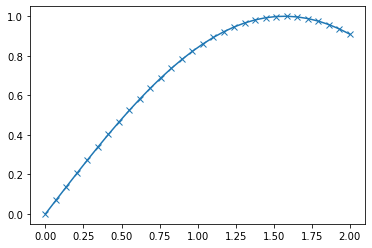

In [10]:
# Get an array of 50 values between 0 and 2
x_lin = np.linspace(0, 2, 30)

print(x_lin)
plt.plot(x_lin,np.sin(x_lin),'x-')

`np.linspace` is useful if we for example wish to plot a function $f(x)$.
Then we need a list of $x$-values for which we can calculate the $y=f(x)$ values.
Notice how the spacing between the points are the same, the points are *lin*early distributed in *space*.
Sometimes we wish to have more control over the distance between points, rather than the number of points. For this we use `np.arange`.

In [11]:
# Get an array of values between 0 and 2 with spacing 0.1
x_range = np.arange(0, 2, 0.1)
print(x_range)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


In [12]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Notice that the endpoint, 2, is not included, much like the built-in Python function `range`.

Choosing between `linspace` and `arange` depends on our need.
Often we just need some points on an interval, and the exact spacing does not really matter.
In this situation we obviously want to use `linspace`.
However, sometimes the spacing is more important than the number of points, then `arange` is used.

One can also generate an array from an existing list, using `np.array()`, as was done in the introduction of this notebook.

There are many more functions that give us arrays of various shapes and sizes, we will not go through them all here. But two more functions should be mentioned, `np.zeros` and `np.ones`, which gives us a list of zeros and ones respectively.

In [13]:
# Generate two lists, one with zeros and one with ones, both with length 20
zeros = np.zeros(20)
ones = np.ones(20)

# Let us see how they look
print(zeros)
print(ones)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


`np.zeros` and `np.ones` are often useful for initializing arrays that are to be used later.

## Slicing and indexing
With arrays, it is useful to refer to only the elements we want, just like we do with indexing in normal lists.

Lets review normal lists first.
Remember that lists are 0-indexed, that is the first element is element 0, the second is 1 and so on.

In [14]:
my_list = [1, 2, 3, 4]  # Normal Python list

# We can access different parts of the list by slicing and indexing:
print("my_list[0]:\t", my_list[0])     # First element
print("my_list[:2]:\t", my_list[:2])   # The two first elements
print("my_list[-2:]:\t", my_list[-2:]) # The last two elements

my_list[0]:	 1
my_list[:2]:	 [1, 2]
my_list[-2:]:	 [3, 4]


In [15]:
np.array(my_list[1:])-np.array(my_list[:-1])

array([1, 1, 1])

In general the syntax for slicing a lists is `my_list[start:end:step]`, where `start` is the first element we want, `end` is the last element (non-inclusive), and `step` is the step size.
Note that if `start` or `end` is empty, we get from the start or to the end respectively.
Negative values count from the end, so that -1 is the last element.

If you are completely unfamiliar with this, you are advised to play around with it now, before moving on to `array` slicing.

We can do the same with arrays, but arrays have even more ways of slicing!

The syntax for slicing in NumPy is exactly the same as for lists, but we can do it for each dimension!
For a two-dimensional array the syntax then becomes `my_array[start_1:end_1,  start_2:end_2]`, where `start_1` and `end_1` is the start and end values for the first axis, and similarly with `start_2` and `end_2` for the second axis.

## Loading and Saving Data

The numpy built in commands `np.loadtxt` and `np.savetxt`, `np.load`, `np.savez` can be used 
for easily saving and reading values from files.

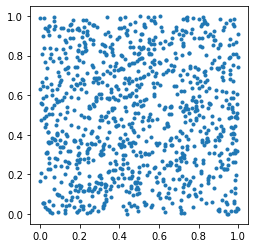

In [35]:
x = np.random.uniform(0,1,size=1000)
y = np.random.uniform(0,1,size=1000)

np.savez_compressed("/tmp/test.npz", x=x, y=y) # save to disk
#np.savez("/tmp/test.npz", x=x, y=y)

x = y = 0

file = np.load("/tmp/test.npz") # reload our data from disk

plt.plot(file['x'],file['y'],'.'); # note that we saved the names too.
plt.gca().set_aspect(1)

### Plotting from saved data

Now that we just learned how to write our (named) data to disk we can use plotting packages to interact with it and make publication ready plots. 
Allow me to recommend for you to check out [Veusz](https://veusz.github.io). 

![veusz](./veusz-screenshot-3d.png)

I find a joy to work with. Especially with `.npz` or [hdf5](https://www.h5py.org) `.h5` files.



## Final note
There is much more to be said about NumPy, this was merely the very basics.

NumPy is very well documented and there is much useful information available on the internet.
See the [official documentation](https://docs.scipy.org/doc/numpy).

Some noteworthy functionality that was omitted in this notebook:
 - The `numpy.linalg` library: useful linear algebra functions, such as solving matrix equations and decomposition.
 - Multidimensional arrays, that are analogous to matrices.